<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
import taiko as tk
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import posixpath
from skimage.io import imshow, imsave, imread
import os

sns.set(font_scale=1.5)

In [3]:
record_files = glob('../data/alpha/*/*/record_table.csv')
record_dfs = []
for record_file_path in record_files:
    record_df = pd.read_csv(record_file_path)
    record_dfs.append(record_df)
record_df = pd.concat(record_dfs, ignore_index=True)

record_df = record_df[(record_df['song_id'] == 99)]
record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
0,aaaaa,99,L_2018-09-28_111140.csv,R_2018-09-28_111142.csv,capture_2018_09_28_11_11_42
24,carolyn,99,L_2018-09-27_154737.csv,R_2018-09-27_154737.csv,capture_2018_09_27_15_47_37
41,cuxi,99,L_2018-09-25_154843.csv,R_2018-09-25_154847.csv,capture_2018_09_25_15_48_47
58,cuxi,99,L_2018-09-26_113735.csv,R_2018-09-26_113737.csv,capture_2018_09_26_11_37_36
75,fatfat,99,L_2018-09-26_200112.csv,R_2018-09-26_200114.csv,capture_2018_09_26_20_01_13
92,eve,99,L_2018-09-26_171226.csv,R_2018-09-26_171225.csv,capture_2018_09_26_17_12_25
109,eve,99,L_2018-09-28_161808.csv,R_2018-09-28_161809.csv,capture_2018_09_28_16_18_09
126,oliver,99,L_2018-09-26_183904.csv,R_2018-09-26_183921.csv,capture_2018_09_26_18_39_20
144,oliver,99,L_2018-09-28_151120.csv,R_2018-09-28_151122.csv,capture_2018_09_28_15_11_22
161,chris,99,L_2018-09-26_132923.csv,R_2018-09-26_132926.csv,capture_2018_09_26_13_29_25


In [4]:
PREFIX = ['right_don', 'left_don', 'right_ka', 'left_ka', 'big_don', 'big_ka', 'pause', 'drumroll']
SUFFIX = ['start', 'end']

columns = ['drummer_name', 'left_sensor_datetime', 'right_sensor_datetime']
for prefix_ in PREFIX:
    for suffix_ in SUFFIX:
        columns += [prefix_ + '_' + suffix_]
        
profile_record_df = pd.DataFrame(columns=columns)

In [5]:
ref_avline = [
    # id = 0
    
    [1538104303.5, 1538104306.5, 1538104306.8, 1538104309.2, 1538104310.3, 1538104312.6, 1538104313.3, 1538104315.6, 1538104318.6, 1538104321, 1538104321.9, 1538104324.5, 1538104325.5, 1538104329, 1538104329.5, 1538104333.5],

    # id = 24
    
    [1538034458, 1538034461.8, 1538034462.6, 1538034466, 1538034467, 1538034470.8, 1538034471.5, 1538034475, 1538034477.5, 1538034481.2, 1538034482.5, 1538034486.2, 1538034487, 1538034490, 1538034491, 1538034495],

    # id = 41
    
    [1537861727.5, 1537861731.5, 1537861731.6, 1537861736.1, 1537861736.2, 1537861740.8, 1537861740.9, 1537861745.5, 1537861745.6, 1537861749.9, 1537861750, 1537861754.6, 1537861755.2, 1537861757.5, 1537861758.1, 1537861764.1],

    # id = 58
    
    [1537933057.5, 1537933061.5, 1537933061.6, 1537933065.5, 1537933065.6, 1537933070, 1537933070.1, 1537933074, 1537933074.1, 1537933078.5, 1537933078.6, 1537933082.8, 1537933082.9, 1537933083.6, 1537933083.8, 1537933088.6],

    # id = 75
    
    [1537963275.3, 1537963280.2, 1537963281.1, 1537963286, 1537963287, 1537963291.8, 1537963292.5, 1537963297.5, 1537963299, 1537963303.8, 1537963305, 1537963310, 1537963311, 1537963314, 1537963314.8, 1537963319.8],

    # id = 92
    
    [1537953146.3, 1537953149.5, 1537953149.6, 1537953153.2, 1537953153.3, 1537953157, 1537953157.1, 1537953161, 1537953161.2, 1537953165, 1537953166.8, 1537953170.8, 1537953171.7, 1537953175, 1537953175.2, 1537953179.6],

    # id = 109
    
    [1538122691.5, 1538122696.1, 1538122696.4, 1538122701, 1538122702, 1538122707, 1538122707.5, 1538122712.8, 1538122715.5, 1538122720.8, 1538122722, 1538122727, 1538122731.6, 1538122735, 1538122735.1, 1538122739.7],
    
    # id = 126
    
    [1537958367.5, 1537958372.3, 1537958372.8, 1537958377.5, 1537958378.8, 1537958383.7, 1537958384.2, 1537958388.8, 1537958391, 1537958396, 1537958396.8, 1537958401.8, 1537958402.1, 1537958407.2, 1537958407.7, 1537958412.5],

    # id = 144
    
    [1538118684.8, 1538118688.7, 1538118690.5, 1538118694.3, 1538118694.4, 1538118698.1, 1538118698.8, 1538118702.6, 1538118704.3, 1538118708.2, 1538118708.8, 1538118712.8, 1538118713.1, 1538118716.8, 1538118717.1, 1538118720.8],
    
    # id = 161
    
    [1537939766.5, 1537939770.5, 1537939770.6, 1537939774.5, 1537939774.8, 1537939778.5, 1537939778.8, 1537939782.5, 1537939782.7, 1537939786, 1537939786.5, 1537939790, 1537939791, 1537939794, 1537939794.5, 1537939798.8],

    # id = 178
    
    [1538392551.3, 1538392554.8, 1538392555, 1538392558.8, 1538392559.3, 1538392563.1, 1538392563.3, 1538392567.2, 1538392567.5, 1538392571.5, 1538392571.7, 1538392575.5, 1538392576.1, 1538392578.9, 1538392579.2, 1538392583.4],
    
    # id = 195
    
    [1538017589.4, 1538017593.6, 1538017594.2, 1538017598.3, 1538017599.3, 1538017603.5, 1538017604.4, 1538017608.4, 1538017609.1, 1538017613, 1538017614, 1538017617.9, 1538017618.3, 1538017623.8, 1538017624.3, 1538017629.2],
    
    # id = 213
    
    [1538199875.4, 1538199879.2, 1538199880, 1538199884, 1538199884.8, 1538199888.6, 1538199889.6, 1538199893.2, 1538199894.4, 1538199898, 1538199899.1, 1538199902.8, 1538199903.5, 1538199907.5, 1538199908, 1538199912.2],
    
    # id = 248
    
    [1537596430.3, 1537596437.6, 1537596437.7, 1537596445.7, 1537596446.1, 1537596454, 1537596454.1, 1537596461.9, 1537596462, 1537596470, 1537596470.1, 1537596478, 1537596484.6, 1537596487, 1537596478.5, 1537596483],

    # id = 253
    
    [1538220035.6, 1538220042.2, 1538220042.3, 1538220049, 1538220049.1, 1538220055.7, 1538220055.8, 1538220062.7, 1538220062.8, 1538220069.8, 1538220069.9, 1538220077, 1538220077.5, 1538220079.5, 1538220079.9, 1538220083.8],

    # id = 270
    
    [1537596860.8, 1537596869, 1537596869.5, 1537596876.7, 1537596877.1, 1537596884.2, 1537596884.3, 1537596891.5, 1537596891.8, 1537596899, 1537596899.1, 1537596906.5, 1537596910.4, 1537596911.2, 1537596907.2, 1537596909],
    
    # id = 289
    
    [1537855725.5, 1537855730.6, 1537855731.1, 1537855736.6, 1537855737.4, 1537855742.9, 1537855743.2, 1537855748.6, 1537855749.4, 1537855755.3, 1537855755.7, 1537855761, 1537855762, 1537855766.2, 1537855767.2, 1537855771],

    # id = 306
    
    [1538138331, 1538138337, 1538138337.1, 1538138343, 1538138343.8, 1538138349.7, 1538138349.8, 1538138355.7, 1538138357.5, 1538138363.5, 1538138364.2, 1538138370.3, 1538138371, 1538138372.7, 1538138373, 1538138375.4],

    # id = 323
    
    [1537881775.5, 1537881781, 1537881781.1, 1537881786.3, 1537881786.5, 1537881791.8, 1537881792, 1537881797.2, 1537881797.5, 1537881802.7, 1537881802.8, 1537881807.8, 1537881808.2, 1537881810.5, 1537881810.7, 1537881815],
    
    # id = 340
    
    [1538134456.7, 1538134461.6, 1538134461.8, 1538134466.7, 1538134466.8, 1538134471.6, 1538134471.7, 1538134476.5, 1538134476.8, 1538134481.5, 1538134481.8, 1538134486.5, 1538134487, 1538134489, 1538134489.6, 1538134493.2],
]

In [17]:
new_id = 0
for id_, row in record_df.iterrows():
#     if id_ < 340:
#         continue
    left_sensor_name = row['left_sensor_datetime']
    right_sensor_name = row['right_sensor_datetime']
    who_name = row['drummer_name']
    song_id = row['song_id']
    
    dirs = glob('../data/alpha/' + who_name + '/*/sensor_data/' + left_sensor_name)
    left_df = pd.read_csv(dirs[0])

    dirs = glob('../data/alpha/' + who_name + '/*/sensor_data/' + right_sensor_name)
    right_df = pd.read_csv(dirs[0])
    
    for e_id in range(0, len(ref_avline[new_id]), 2):
        start_timestamp = ref_avline[new_id][e_id]
        end_timestamp = ref_avline[new_id][e_id + 1]
        
        left_crop_df = left_df[(left_df.timestamp >= start_timestamp) & (left_df.timestamp <= end_timestamp)]
        right_crop_df = right_df[(right_df.timestamp >= start_timestamp) & (right_df.timestamp <= end_timestamp)]
#         print(left_crop_df, right_crop_df)
    
        filepath = '../data/alpha_profile/' + PREFIX[e_id // 2] + '/left/' + who_name + '_' + str(id_) + '.csv'
        dirname = os.path.dirname(filepath)
        os.makedirs(dirname, exist_ok=True)
        left_crop_df.to_csv(filepath, index=False, float_format='%.4f')
        
        filepath = '../data/alpha_profile/' + PREFIX[e_id // 2] + '/right/' + who_name + '_' + str(id_) + '.csv'
        dirname = os.path.dirname(filepath)
        os.makedirs(dirname, exist_ok=True)
        right_crop_df.to_csv(filepath, index=False, float_format='%.4f')
        
        
    new_id += 1

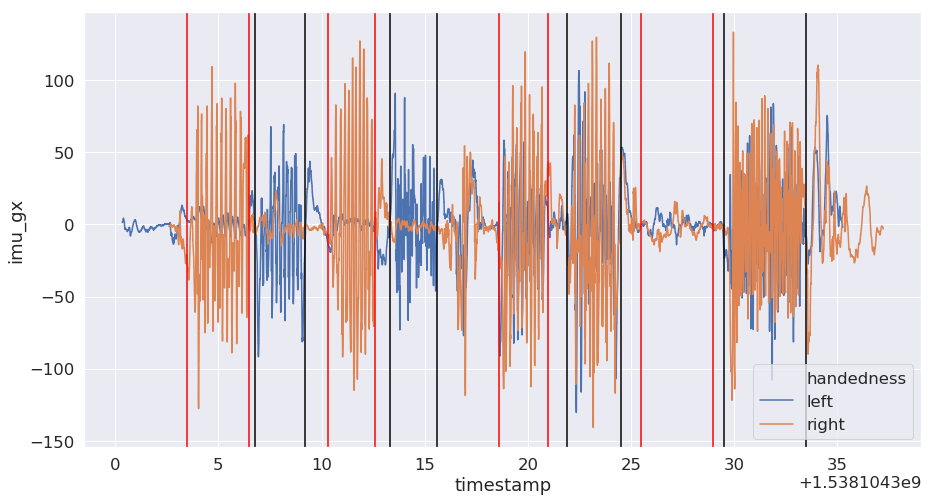

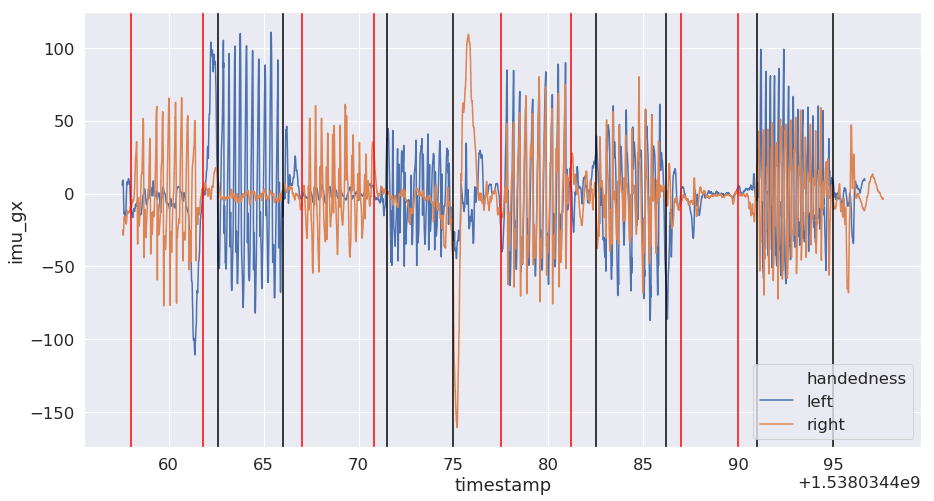

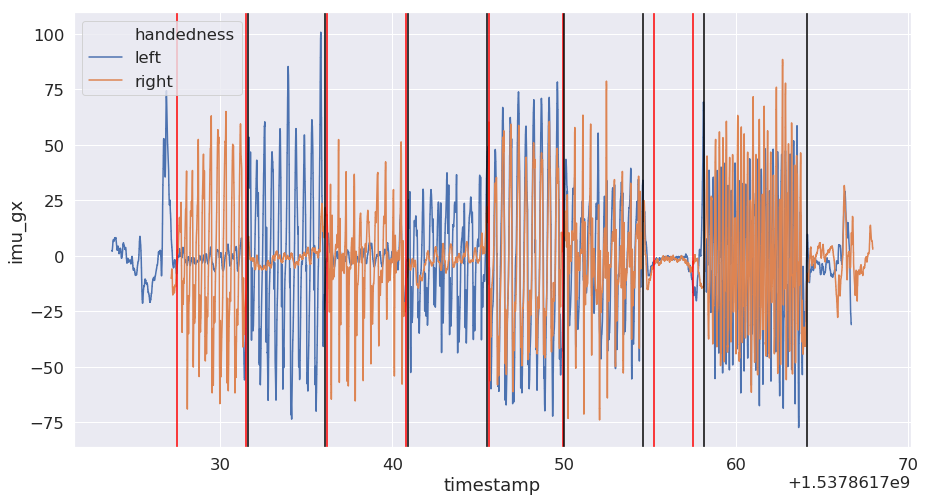

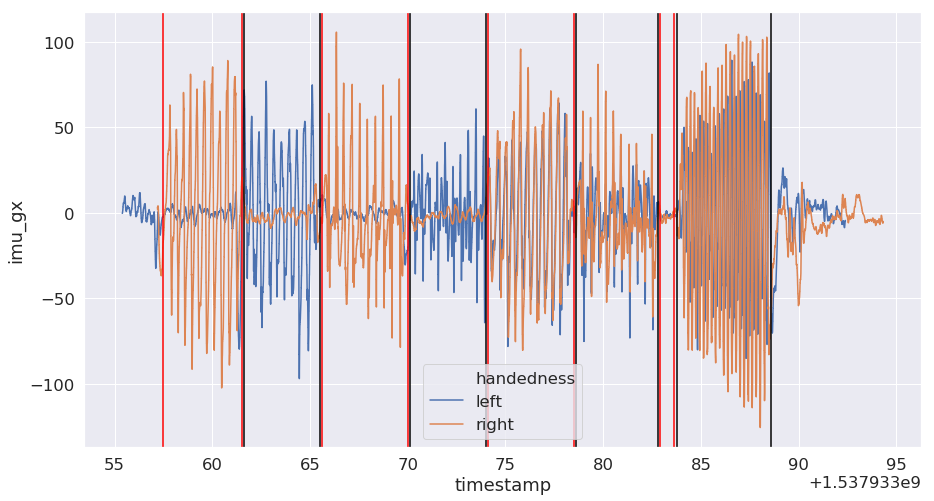

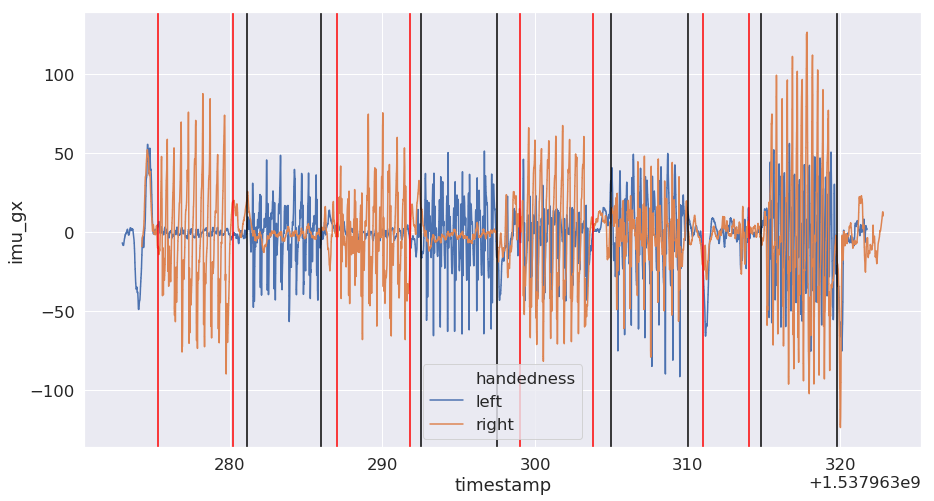

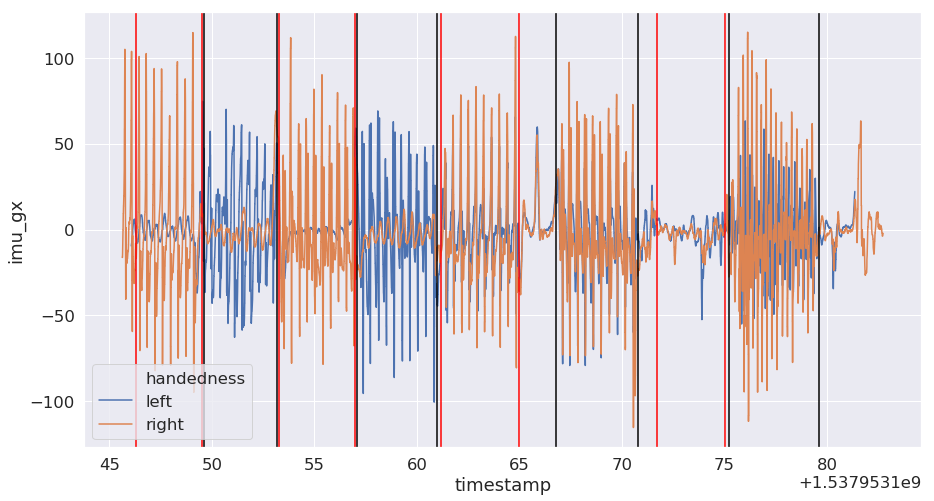

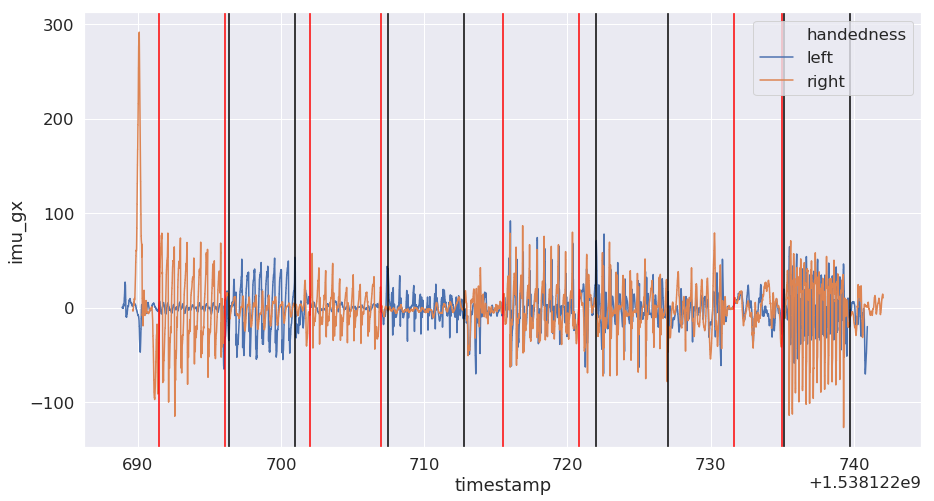

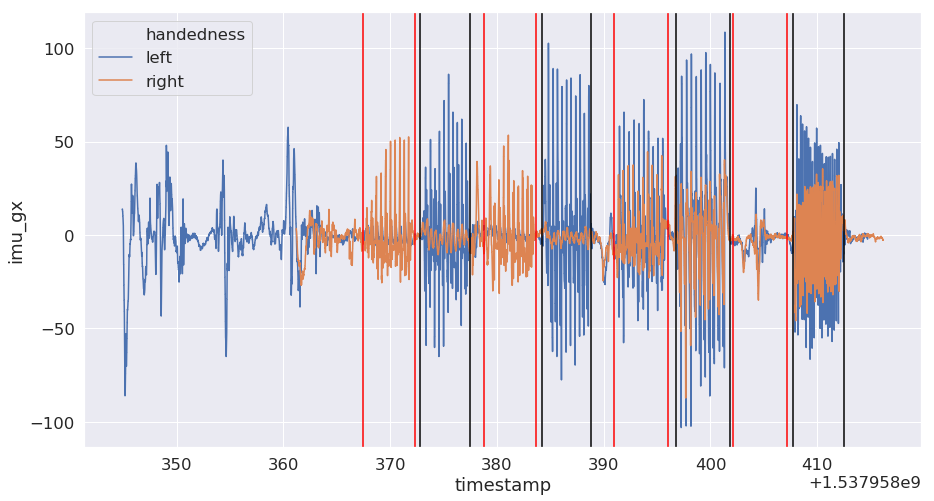

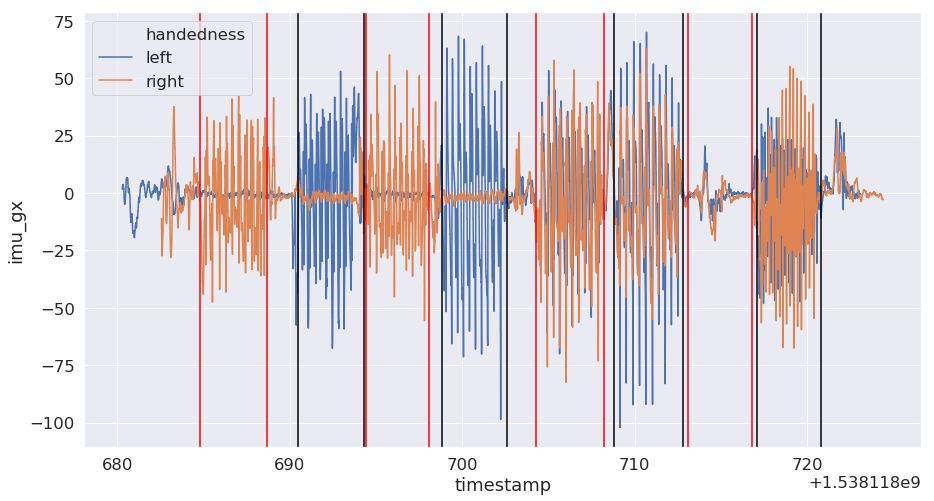

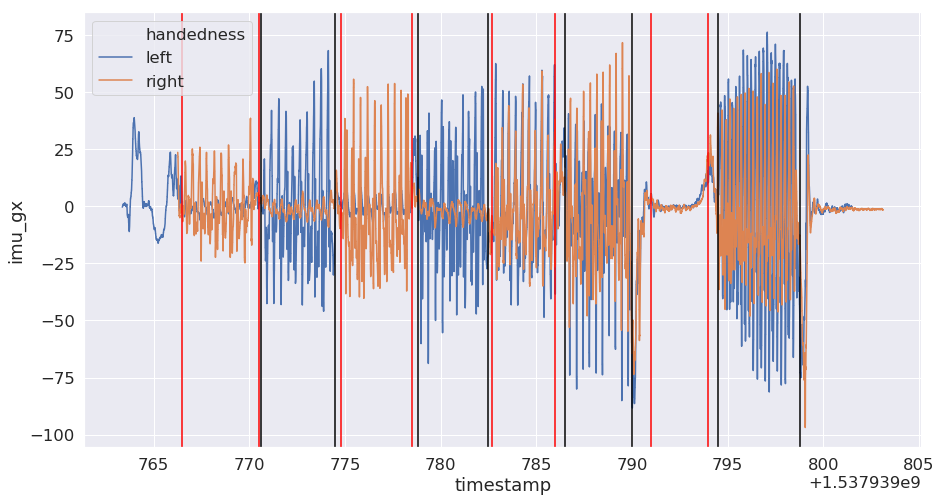

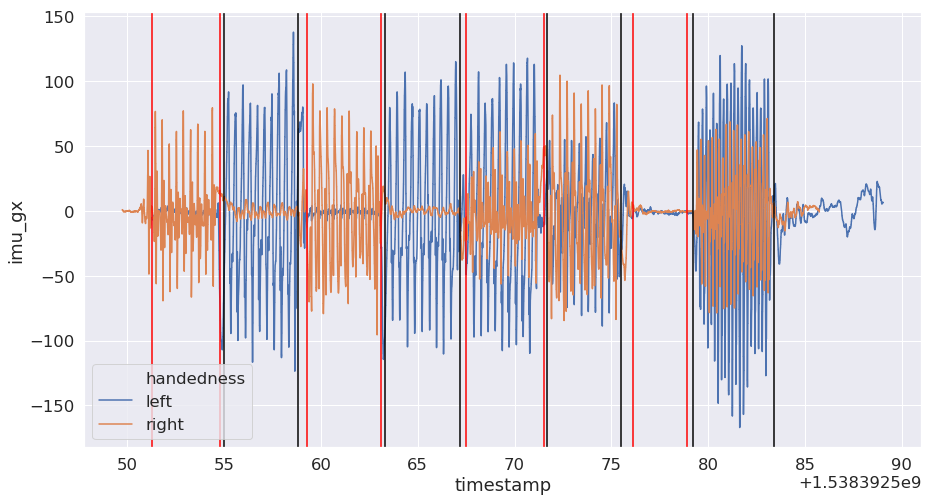

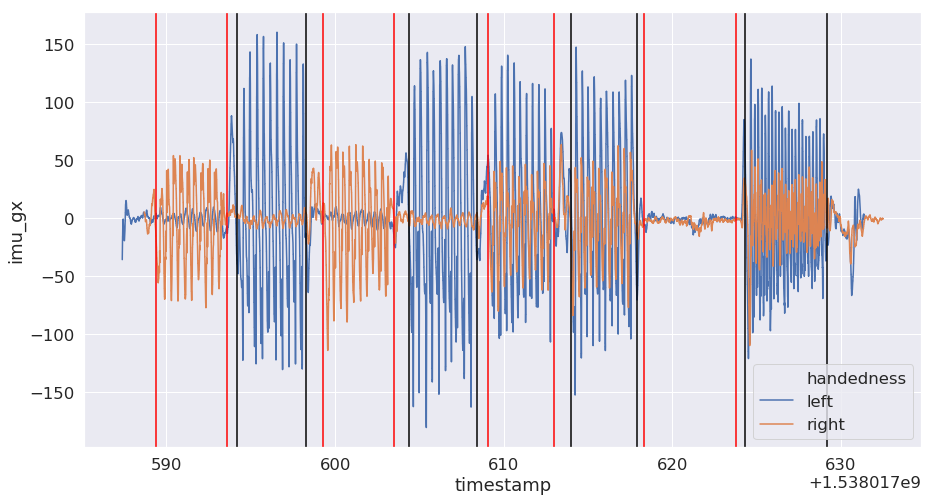

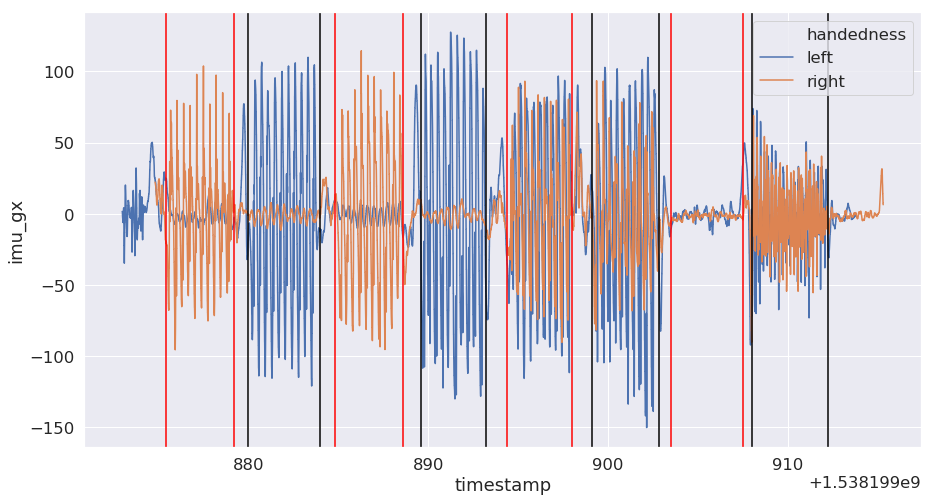

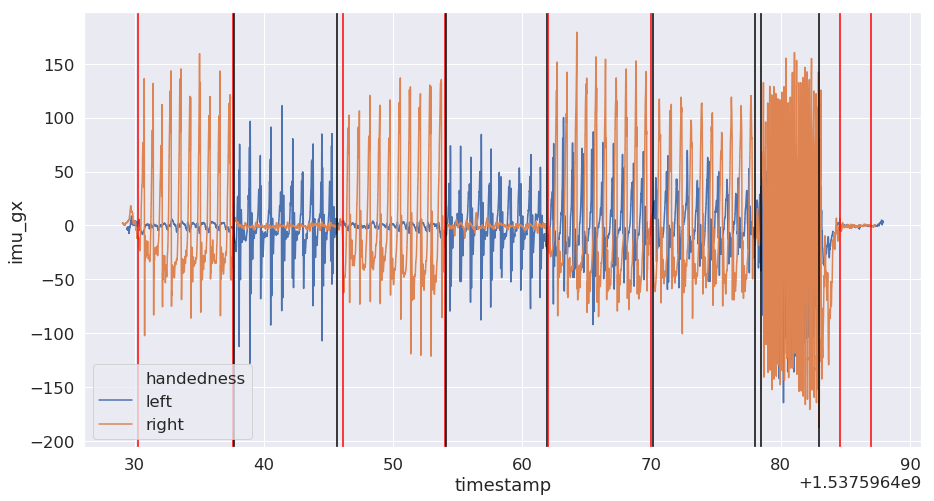

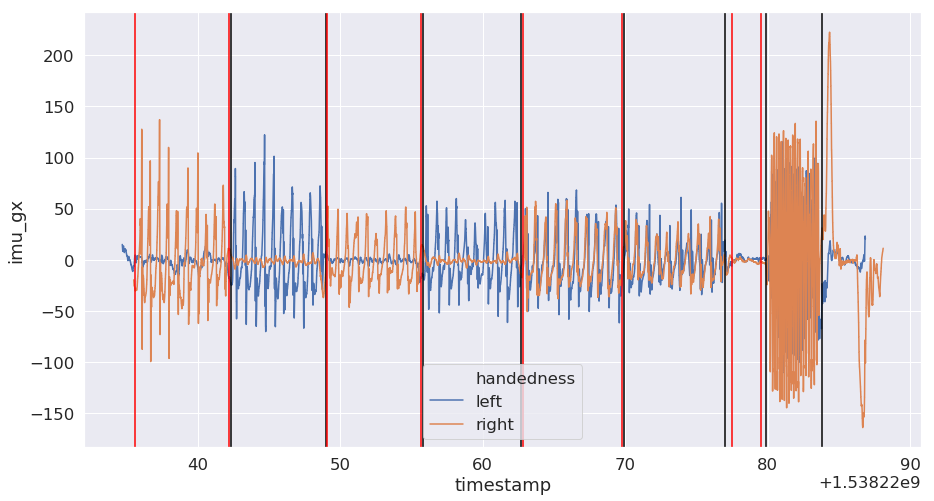

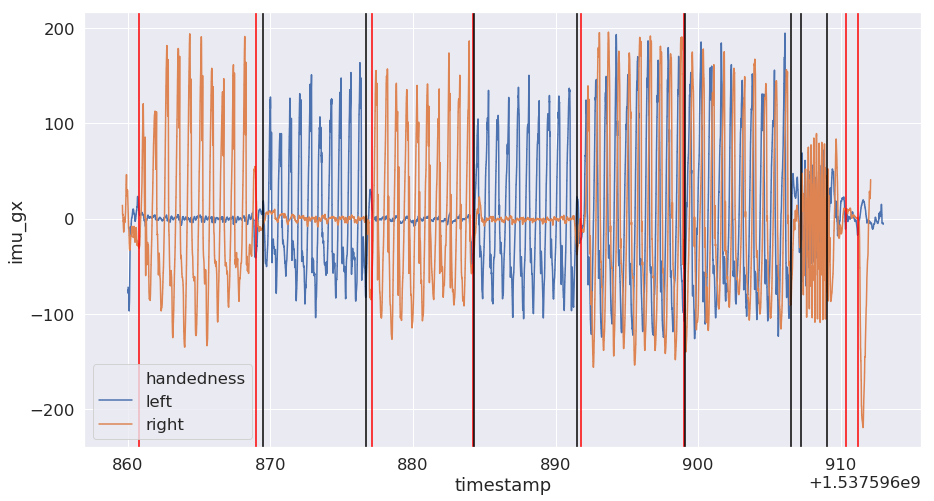

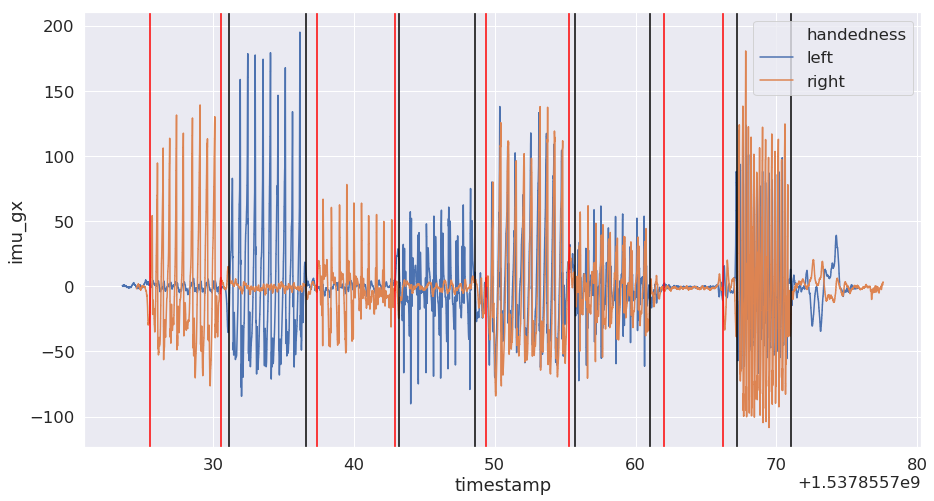

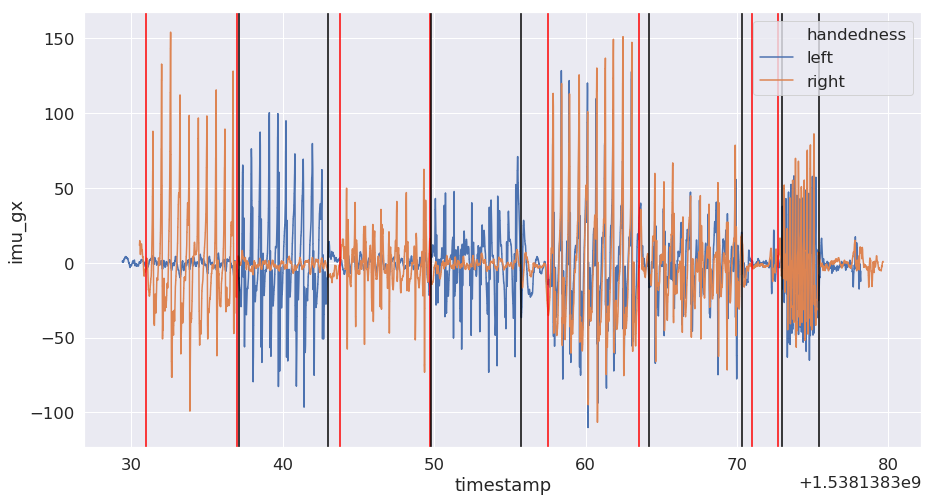

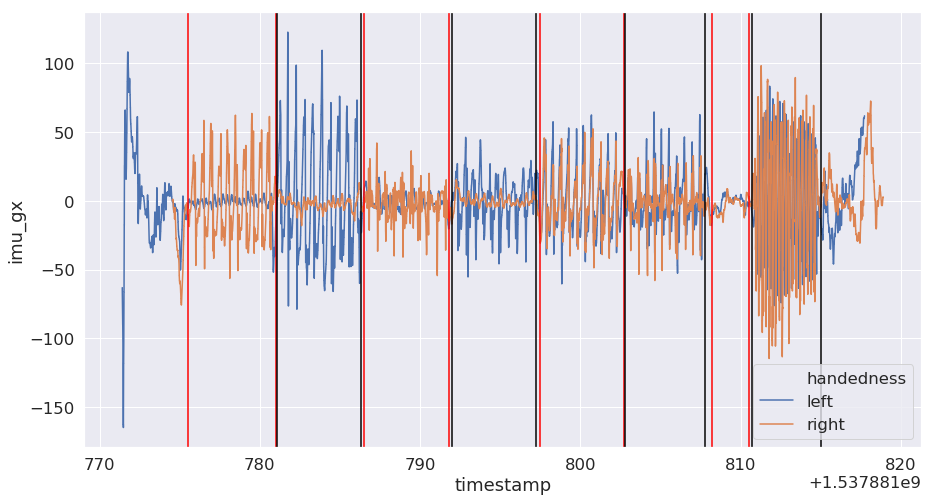

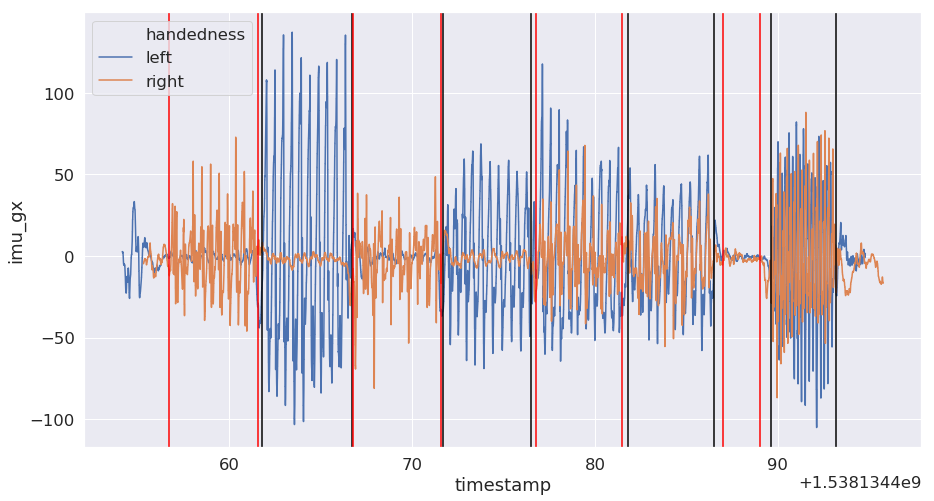

In [6]:
new_id = 0
for id_, row in record_df.iterrows():
#     if id_ < 340:
#         continue
    left_sensor_name = row['left_sensor_datetime']
    right_sensor_name = row['right_sensor_datetime']
    who_name = row['drummer_name']
    song_id = row['song_id']
    
    dirs = glob('../data/alpha/' + who_name + '/*/sensor_data/' + left_sensor_name)
    left_df = pd.read_csv(dirs[0])

    dirs = glob('../data/alpha/' + who_name + '/*/sensor_data/' + right_sensor_name)
    right_df = pd.read_csv(dirs[0])

    left_df['handedness'] = 'left'
    right_df['handedness'] = 'right'

    profile_df = pd.concat([left_df, right_df])
    new_row = [who_name, left_sensor_name, right_sensor_name]
    profile_record_df.loc[new_id] = new_row + [np.nan] * len(PREFIX) * len(SUFFIX)
    
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='timestamp', y='imu_gx', data=profile_df, hue='handedness')
    for e_id, x_ in enumerate(ref_avline[new_id]):
        color_ = 'black'
        if e_id // 2 % 2 == 0:
            color_ = 'red'
        plt.axvline(x=x_, color=color_)
    plt.show()
    new_id += 1
# profile_record_df.to_csv('profile_record_df.csv', index=False)